In [1]:
#import necessary packages
from IPython.display import Image
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

# import the LogisticRegression class from scikit-learn
from sklearn.model_selection import train_test_split

# import train_test_split from from scikit-learn
from sklearn.linear_model import LinearRegression

# import metrics from from scikit-learn
from sklearn import metrics

import warnings
warnings.simplefilter("ignore")

#Load in data 
test_data = pd.read_csv('Test.csv')
train_data = pd.read_csv('Train.csv')
full_data = pd.concat([test_data, train_data], ignore_index=True)

In [2]:
#No missing values
train_data.isnull().sum().sum()

0

In [3]:
#No duplicates
train_data.drop_duplicates(keep = "first")

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,34503001: Ward 1,3261.68067,11551.56486,6.393480,0.874972,0.003146,0.017230,0.004735,0.048888,0.000654,...,0.000472,0.000472,0.000000,0.006203,0,0,ZA3453001,-27.675590,23.057920,9.118927
2818,34503002: Ward 2,1463.06432,7908.90411,15.668000,0.636235,0.002262,0.010433,0.000000,0.003030,0.000000,...,0.003030,0.000713,0.000000,0.008414,0,0,ZA3453002,-27.591408,22.907161,1.697395
2819,34503003: Ward 3,1395.18881,6242.37527,13.238795,0.855975,0.006601,0.061118,0.000812,0.003912,0.000812,...,0.002150,0.001458,0.000000,0.003670,0,0,ZA3453003,-27.952550,22.749698,2.792501
2820,34503004: Ward 4,1679.66964,8014.73089,17.639523,0.792552,0.004423,0.016099,0.000000,0.000674,0.000000,...,0.009235,0.007870,0.000000,0.004803,0,0,ZA3453004,-27.913875,22.755314,2.793699


# EDA 

In [4]:
train_data.shape

(2822, 63)

In [5]:
#total percentage of female-headed poverty in dataset
train_data['target'].sum() / 2882

23.99733470298445

In [6]:
train_data['target'].describe()

count    2822.000000
mean       24.507554
std        10.294387
min         0.000000
25%        16.751556
50%        24.156670
75%        32.226553
max        55.528423
Name: target, dtype: float64

In [7]:
train_data.loc[(train_data['target'] >= 0) & (train_data['target'] <= 15) , 'target_categories'] = '0-15% poverty'
train_data.loc[(train_data['target'] > 15) & (train_data['target'] <= 30), 'target_categories'] = '15-30% poverty'
train_data.loc[(train_data['target'] > 30) & (train_data['target'] <= 45), 'target_categories'] = '30-45% poverty'
train_data.loc[(train_data['target'] > 45) & (train_data['target'] <= 56), 'target_categories'] = '45-56% poverty'
    
train_data.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL,target_categories
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039,15-30% poverty
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775,15-30% poverty
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000,0-15% poverty
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778,15-30% poverty
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000,0-15% poverty


Text(0, 0.5, 'Count')

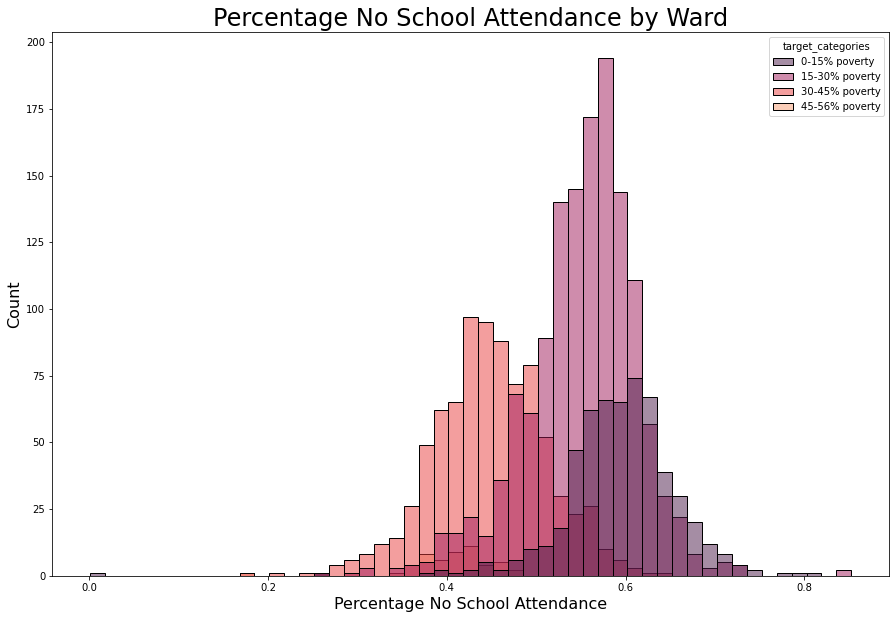

In [10]:
#Histogram plotting percentage of "yes" school attendance per ward, color coded by percentage poverty
plt.figure(figsize=(15,10))
sns.histplot(data=train_data, x="psa_01", hue='target_categories', 
             hue_order = ['0-15% poverty', '15-30% poverty', '30-45% poverty', '45-56% poverty'], 
            palette = 'rocket')
plt.title("Percentage No School Attendance by Ward", size=24)
plt.xlabel("Percentage No School Attendance", size = 16)
plt.ylabel("Count", size =16)


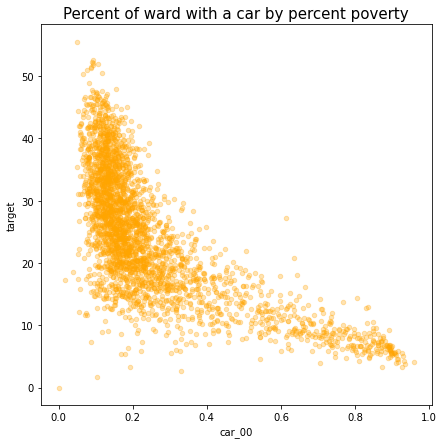

In [14]:
train_data.plot(x='car_00', y='target', kind='scatter', alpha=0.3, color = "orange", figsize=(7, 7))
plt.title("Percent of ward with a car by percent poverty", size=15)
plt.xlabel = ('Percent school attendance per ward')
plt.ylabel = ('Percent below poverty threshold per ward')
#x and y labels arent showing for some reason

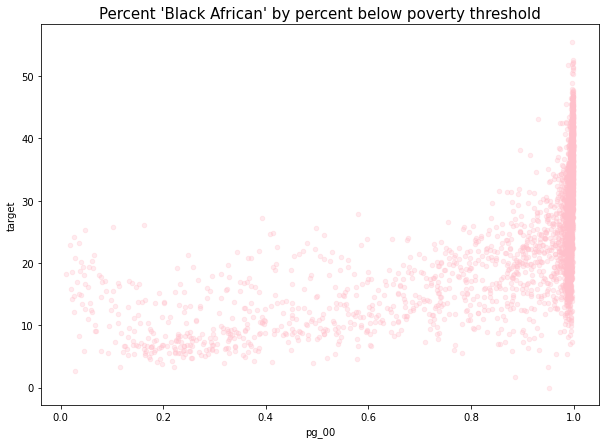

In [212]:
train_data.plot(x='pg_00', y='target', kind='scatter', alpha=0.3, color = "pink", figsize=(10, 7))
plt.title("Percent 'Black African' by percent below poverty threshold", size = 15)
plt.xlabel = ("Percent 'Black African' per ward")
plt.ylabel = ('Percent below poverty threshold per ward')
#x and y labels arent showing for some reason

Text(0.5, 1.0, 'Percent listing language as "Afrikaans" by percent below poverty threshold')

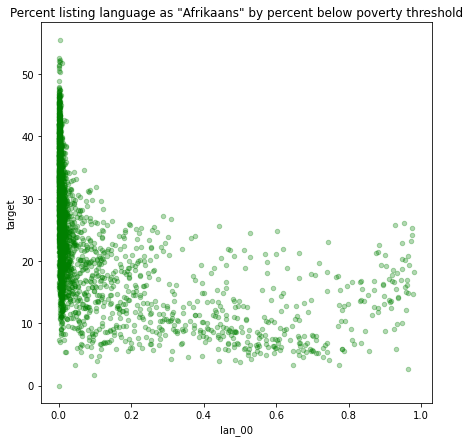

In [217]:
train_data.plot(x='lan_00', y='target', kind='scatter', alpha=0.3, color = "green", figsize=(7, 7))
plt.title('Percent listing language as "Afrikaans" by percent below poverty threshold')

Text(0.5, 1.0, 'Percent with in-dwelling piped water access by percent poverty')

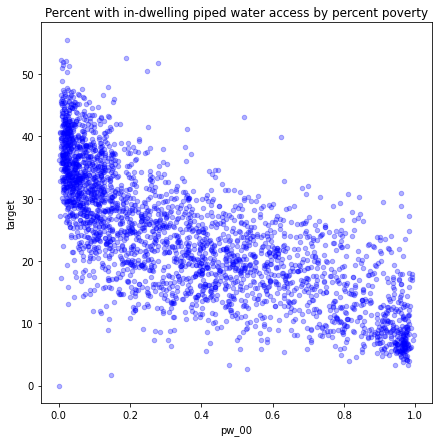

In [218]:
train_data.plot(x='pw_00', y='target', kind='scatter', alpha=0.3, color = "blue", figsize=(7, 7))
plt.title("Percent with in-dwelling piped water access by percent poverty")

In [154]:
#Most Correlated Values
corr_matrix = train_data.corr()
corr_matrix["target"].sort_values(ascending=False)[:10]

target    1.000000
psa_00    0.782472
car_01    0.702831
stv_01    0.664181
lln_01    0.637835
pg_00     0.613346
pw_06     0.470676
dw_01     0.458206
pw_02     0.442441
pw_03     0.440941
Name: target, dtype: float64

In [155]:
corr_matrix["target"].sort_values(ascending=True)[:10]

pw_00    -0.754536
psa_01   -0.707506
car_00   -0.702831
stv_00   -0.664181
lln_00   -0.637835
pg_03    -0.583908
NL       -0.514398
lan_00   -0.507942
lan_01   -0.438704
dw_04    -0.385533
Name: target, dtype: float64

In [156]:
#Best Model Features: psa_00, car_01, stv_01, lln_01, pg_00, pw_00, psa_01, car_00, stv_00, lln_00, pg_03, NL, lan_00

Text(0.5, 1.0, 'Highest Postive Correlated Features')

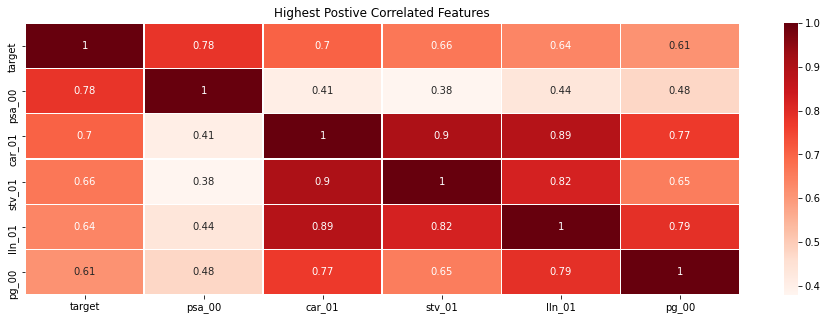

In [157]:
# Heatmap of Highest Positive Correlated Features (with Target variable)
plt.figure(figsize = (16,5))
sns.heatmap(train_data[['target','psa_00', 'car_01', 'stv_01', 'lln_01', 'pg_00']].corr(), annot=True, cmap = 'Reds', 
            linewidths=.5)
plt.title('Highest Postive Correlated Features')

Text(0.5, 1.0, 'Highest Negative Correlated Features')

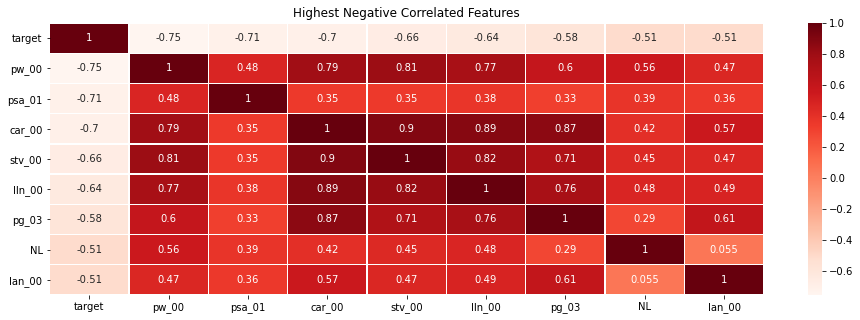

In [158]:
# Heatmap of Highest Negative Correlated Features (with Target variable)
plt.figure(figsize = (16,5))
sns.heatmap(train_data[['target','pw_00', 'psa_01', 'car_00', 'stv_00', 
                        'lln_00', 'pg_03', 'NL', 'lan_00']].corr(), annot=True, cmap = 'Reds', 
            linewidths=.5)
plt.title('Highest Negative Correlated Features')

<AxesSubplot:>

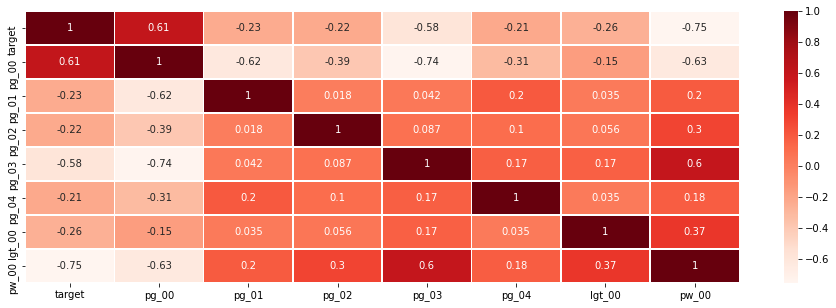

In [159]:
plt.figure(figsize = (16,5))
sns.heatmap(train_data[['target', 'pg_00', 'pg_01', 'pg_02', 'pg_03',
       'pg_04', 'lgt_00', 'pw_00']].corr(), annot=True, cmap = 'Reds', 
            linewidths=.5)

# Model 1 (linear regression with highly correlated features)

In [18]:
X1 = train_data[['psa_00', 'car_01', 'stv_01', 'lln_01', 'pg_00','pw_00', 'psa_01', 'car_00', 'stv_00', 'lln_00', 'pg_03', 'NL', 'lan_00', 
                'lat', 'lon']]
y1 = train_data["target"]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state = 17)
model1 = LinearRegression()

model1.fit(X_train1, y_train1)

LinearRegression()

In [161]:
y_pred1= model1.predict(X_test1)

In [162]:
print('R^2:',metrics.r2_score(y_test1, y_pred1))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test1, y_pred1))*(len(y_test1)-1)/(len(y_test1)-X_test1.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test1, y_pred1))
print('MSE:',metrics.mean_squared_error(y_test1, y_pred1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

R^2: 0.8358972191455909
Adjusted R^2: 0.8314135366085852
MAE: 3.248636822808614
MSE: 17.33938970284486
RMSE: 4.164059281860053


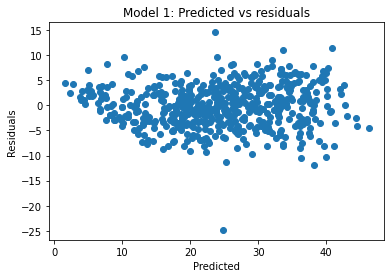

In [163]:
# Checking residuals
%matplotlib inline
plt.scatter(y_pred1,y_test1-y_pred1)
plt.title("Model 1: Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

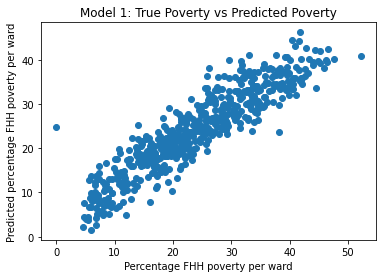

In [164]:
# Visualizing the differences between actual percentages and predicted values
plt.scatter(y_test1, y_pred1)
plt.xlabel("Percentage FHH poverty per ward")
plt.ylabel("Predicted percentage FHH poverty per ward")
plt.title("Model 1: True Poverty vs Predicted Poverty")
plt.show()

# Model 2 (linear regression with all features)

In [165]:
X2 = train_data.drop(['target','ward','ADM4_PCODE', 'target_categories'], axis=1)
y2 = train_data["target"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=17)

In [166]:
model2 = LinearRegression()

model2.fit(X_train2, y_train2)

LinearRegression()

In [167]:
# get the predictions
y_pred2 = model2.predict(X_test2)

In [168]:
print('R^2:',metrics.r2_score(y_test2, y_pred2))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test2, y_pred2))*(len(y_test2)-1)/(len(y_test2)-X_test2.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test2, y_pred2))
print('MSE:',metrics.mean_squared_error(y_test2, y_pred2))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

R^2: 0.858710238233148
Adjusted R^2: 0.8418900284989989
MAE: 2.980115594126802
MSE: 14.928925808216938
RMSE: 3.8637968124911715


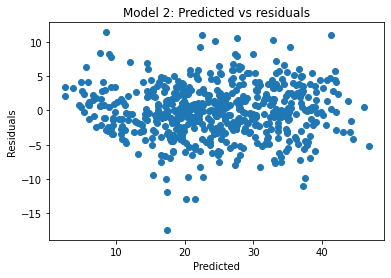

In [169]:
# Checking residuals
plt.scatter(y_pred2,y_test2-y_pred2)
plt.title("Model 2: Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

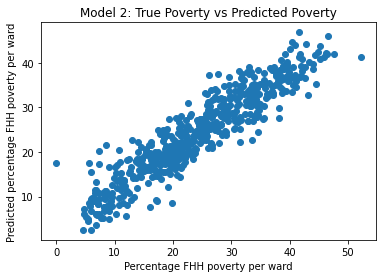

In [170]:
# Visualizing the differences between actual percentages and predicted values
plt.scatter(y_test2, y_pred2)
plt.xlabel("Percentage FHH poverty per ward")
plt.ylabel("Predicted percentage FHH poverty per ward")
plt.title("Model 2: True Poverty vs Predicted Poverty")
plt.show()

# Model 3 (Random Forest Regression with highly correlated features)

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=17, verbose=0, warm_start=False)

In [20]:
reg.fit(X_train1, y_train1)
y_pred3 = reg.predict(X_test1)

In [21]:
acc_rf_train = metrics.r2_score(y_test1, y_pred3)
print('R^2:',metrics.r2_score(y_test1, y_pred3))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test1, y_pred3))*(len(y_test1)-1)/(len(y_test1)-X_test1.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test1, y_pred3))
print('MSE:',metrics.mean_squared_error(y_test1, y_pred3))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test1, y_pred3)))

R^2: 0.8727399644546371
Adjusted R^2: 0.8692629143031244
MAE: 2.780667208904761
MSE: 13.446520152980385
RMSE: 3.6669497069063253


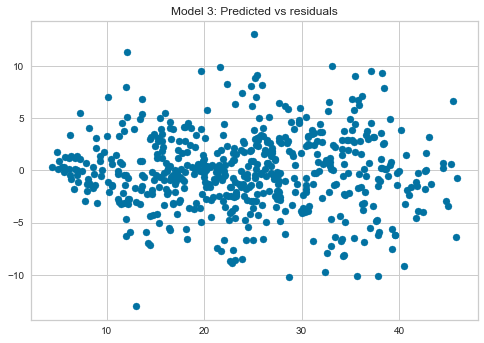

In [29]:
# Checking residuals
plt.scatter(y_pred3,y_test1-y_pred3)
plt.title("Model 3: Predicted vs residuals")
plt.show()

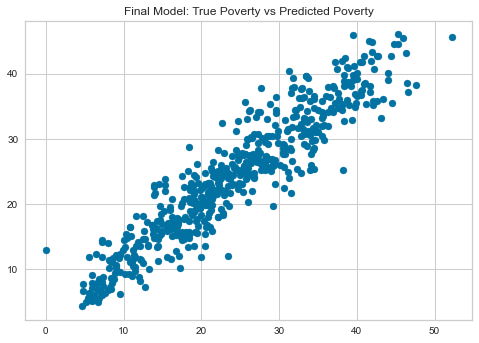

In [28]:
# Visualizing the differences between actual percentages and predicted values
plt.scatter(y_test1, y_pred3)
#plt.xlabel("Percentage FHH poverty per ward")
#plt.ylabel("Predicted percentage FHH poverty per ward")
plt.title("FinaTrue Poverty vs Predicted Poverty")
plt.show()

### Model 3 is the best performing model.

## Model 3 Cross Validation

In [231]:
import warnings
warnings.simplefilter("ignore")
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from math import sqrt

In [239]:
in_cols = train_data[['psa_00', 'car_01', 'stv_01', 'lln_01', 'pg_00','pw_00', 'psa_01', 'car_00', 'stv_00', 'lln_00', 'pg_03', 'NL', 'lan_00', 
                'lat', 'lon']].columns
y_col = 'target'
in_cols

Index(['psa_00', 'car_01', 'stv_01', 'lln_01', 'pg_00', 'pw_00', 'psa_01',
       'car_00', 'stv_00', 'lln_00', 'pg_03', 'NL', 'lan_00', 'lat', 'lon'],
      dtype='object')

In [240]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False)
for train, test in kf.split(X1):
  print(train_data.iloc[train].shape, train_data.iloc[test].shape)

(2257, 70) (565, 70)
(2257, 70) (565, 70)
(2258, 70) (564, 70)
(2258, 70) (564, 70)
(2258, 70) (564, 70)


In [241]:
# Test in CV
kf = KFold(n_splits=5, shuffle=False)
scores = []
for train, test in kf.split(train_data):
  reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=17, verbose=0, warm_start=False)
  reg.fit(train_data[in_cols].iloc[train], train_data[y_col].iloc[train])
  rmse = np.sqrt(mean_squared_error(train_data[y_col].iloc[test], reg.predict(train_data[in_cols].iloc[test])))
  scores.append(rmse)
  print(rmse)
print("Average score in 5-fold CV:", np.mean(scores))

3.9414534988633347
3.8796160854896895
4.657987520289239
4.510355520735674
4.118799027024138
Average score in 5-fold CV: 4.221642330480416


## Feature Engineering

In [242]:
train_data['percent_with_car'] = train_data['car_00']*train_data["total_individuals"]/train_data['total_individuals']

train_data['English_speakers'] = train_data['lan_01']*train_data["total_individuals"]/train_data["total_individuals"]

train_data['Informal_dwelling'] = train_data['dw_08']*train_data["total_individuals"]/train_data["total_individuals"]

train_data['Phone_access'] = train_data['lln_00']*train_data["total_individuals"]/train_data["total_individuals"]

train_data['Water_access'] = (1- train_data['pw_06']*train_data["total_individuals"])/train_data["total_individuals"]

train_data['Non_English'] = (1- train_data["lan_01"])

in_cols = train_data[['psa_00', 'car_01', 'stv_01', 'lln_01', 'pg_00','pw_00', 'psa_01', 'car_00', 
                      'stv_00', 'lln_00', 'pg_03', 'NL', 'lan_00', 'lat', 'lon', 'percent_with_car',
                     'English_speakers', 'Informal_dwelling', 'Phone_access', 'Water_access', 
                     'Non_English']].columns
in_cols # Check that the new features are included

Index(['psa_00', 'car_01', 'stv_01', 'lln_01', 'pg_00', 'pw_00', 'psa_01',
       'car_00', 'stv_00', 'lln_00', 'pg_03', 'NL', 'lan_00', 'lat', 'lon',
       'percent_with_car', 'English_speakers', 'Informal_dwelling',
       'Phone_access', 'Water_access', 'Non_English'],
      dtype='object')

In [243]:
kf = KFold(n_splits=5, shuffle=False)
scores = []
for train, test in kf.split(train_data):
  reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=17, verbose=0, warm_start=False)
  reg.fit(train_data[in_cols].iloc[train], train_data[y_col].iloc[train])
  rmse = np.sqrt(mean_squared_error(train_data[y_col].iloc[test], reg.predict(train_data[in_cols].iloc[test])))
  scores.append(rmse)
  print(rmse)
print("Average score in 5-fold CV:", np.mean(scores))

3.9038095483271076
3.8114337494508415
4.610654380636945
4.576125848843086
4.134194460940856
Average score in 5-fold CV: 4.207243597639767


In [248]:
for md in [15, 18, 21, 24, 27]:
  scores = []
  for train, test in kf.split(train_data):
    reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
    reg.fit(train_data[in_cols].iloc[train], train_data[y_col].iloc[train])
    rmse = sqrt(mean_squared_error(train_data[y_col].iloc[test], reg.predict(train_data[in_cols].iloc[test])))
    scores.append(rmse)
  print("Average score in 5-fold CV:", np.mean(scores), "for max depth:", md)

Average score in 5-fold CV: 4.288309265129885 for max depth: 15
Average score in 5-fold CV: 4.185061138175331 for max depth: 18
Average score in 5-fold CV: 4.248552460303929 for max depth: 21
Average score in 5-fold CV: 4.268452834693705 for max depth: 24
Average score in 5-fold CV: 4.203447390527954 for max depth: 27


In [177]:
#Creating Dataframe of model 3 predictions on train data.
X = X_test1.reset_index().copy() # make a copy of indices and data
X["predictions"] = y_pred3
X['target'] = y_test1.to_list()
X.head()

#Using model 3 to predict test data
X_test_data = test_data[['psa_00', 'car_01', 'stv_01', 'lln_01', 'pg_00','pw_00', 'psa_01', 'car_00', 'stv_00', 'lln_00', 'pg_03', 'NL', 'lan_00', 
                         'lon', 'lat']]
predictions_test = reg.predict(X_test_data)
X2 = X_test_data.reset_index().copy()
X2["predictions"] = predictions_test

#Combining results into one data frame
X_full = pd.concat([X, X2], ignore_index=True) # combine X features from train data and test data
X_full

#making sure lengths are the same
print(len(X) + len(X2))
print(len(X_full))
X_full.head()

1578
1578


,index,psa_00,car_01,stv_01,lln_01,pg_00,pw_00,psa_01,car_00,stv_00,lln_00,pg_03,NL,lan_00,lat,lon,predictions,target
0,1013,0.383211,0.894866,0.891206,0.981574,0.997387,0.107410,0.449241,0.105134,0.108794,0.018426,0.000199,18.107332,0.001331,-28.877861,31.940068,31.434696,31.140769
1,860,0.161806,0.740353,0.727724,0.861599,0.717371,0.558098,0.583116,0.259647,0.272276,0.138401,0.251475,0.539878,0.029784,-29.428908,29.946752,22.833896,13.953825
2,2387,0.274621,0.814998,0.752414,0.942733,0.991490,0.344204,0.612319,0.185002,0.247586,0.057267,0.001469,8.751237,0.005908,-25.393147,27.245629,23.825545,22.346981
3,2361,0.265908,0.821337,0.885924,0.976308,0.991022,0.105520,0.571257,0.178663,0.114076,0.023692,0.000747,16.312561,0.008302,-25.550033,27.908885,22.052550,26.531296
4,1234,0.350124,0.871200,0.836252,0.993675,0.982358,0.273522,0.480458,0.128800,0.163748,0.006325,0.014550,1.483082,0.012598,-27.694340,30.923543,30.324693,26.370504


<AxesSubplot:xlabel='lon', ylabel='lat'>

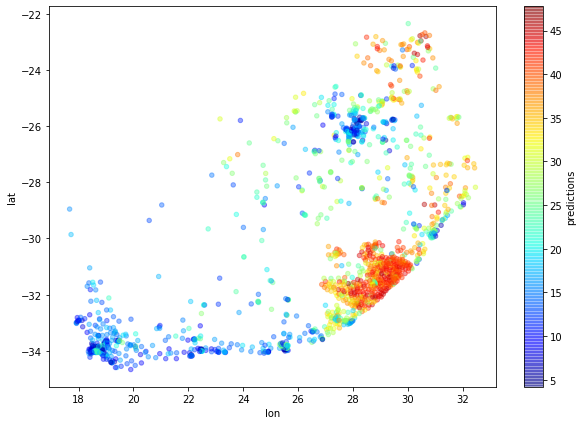

In [179]:
X_full.plot(kind="scatter", x="lon", y="lat", alpha=0.4, figsize=(10,7),
    c="predictions", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

Text(0, 0.5, 'latitude')

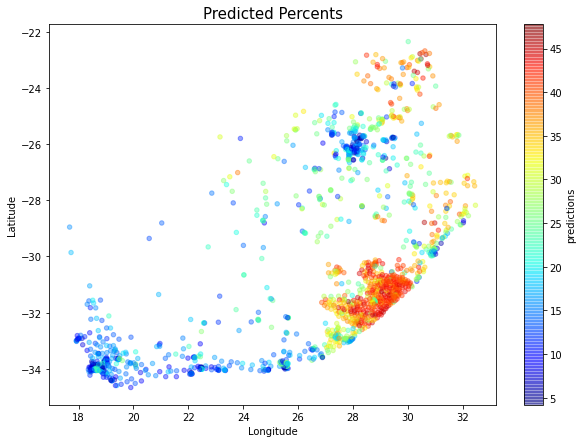

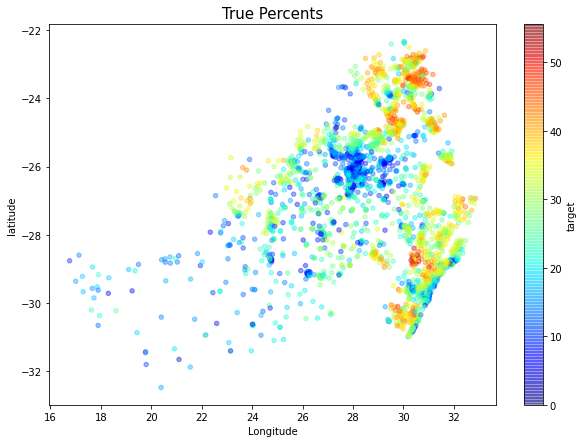

In [193]:

X_full.plot(kind="scatter", x="lon", y="lat", alpha=0.4, figsize=(10,7),
         c="predictions", cmap=plt.get_cmap("jet"), colorbar=True, sharex = False)
plt.title('Predicted Percents', size =15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')


train_data.plot(kind="scatter", x="lon", y="lat", alpha=0.4, figsize=(10,7), 
         c="target", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.title('True Percents', size=15)
plt.xlabel('Longitude')
plt.ylabel('latitude')


In [42]:
# I dont think this is useful at all 
map_pickup = folium.Map(location=[30.5595,22.9375])

# adding the latitude and longitude points to the map.
train_data.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["lon"]] ).add_to(map_pickup), axis=1)

# display the map: just ask for the object representation in juypter notebook.
map_pickup

# optional: save the map.
map_pickup.save('map_pickup.html')

In [43]:
map_pickup

# Clustering

TypeError: 'str' object is not callable

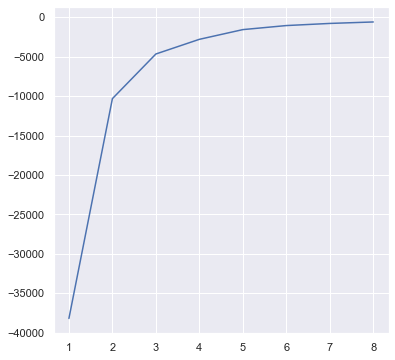

In [253]:
from sklearn.cluster import KMeans
K_clusters = range(1,9)

#range is shifted from 0-4 to 1-5 to avoid infinity-type error

kmeans = [KMeans(n_clusters = i) for i in K_clusters]

Y_axis = full_data[['lat']]
X_axis = full_data[['lon']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualization

plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [254]:
from sklearn.cluster import KMeans ,AgglomerativeClustering

# creates 5 clusters using hierarchical clustering.
agc = AgglomerativeClustering(n_clusters =5, affinity='euclidean', linkage='ward')
train_data['geo cluster'] = agc.fit_predict(train_data[['lat','lon']])

# creates 5 clusters using k-means clustering algorithm.
kmeans = KMeans(5)
clusters = kmeans.fit_predict(train_data[['lat','lon']])
train_data['geo cluster'] = kmeans.predict(train_data[['lat','lon']])

<AxesSubplot:xlabel='lat', ylabel='lon'>

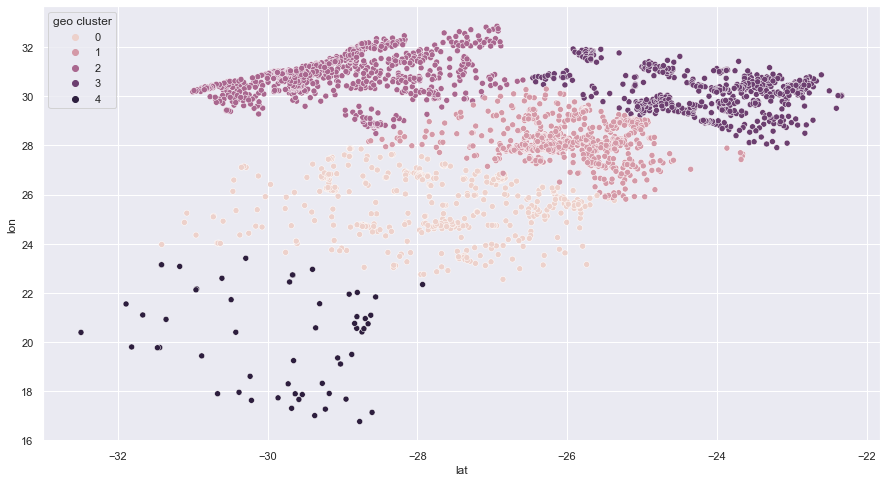

In [255]:
plt.figure(figsize = (15,8))
sns.scatterplot(train_data['lat'], train_data['lon'], hue=train_data['geo cluster'])

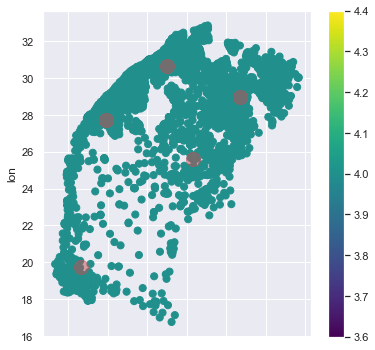

In [256]:
# Using geolocation, coordinates are organized into 5 clusters (0 - 4). These clusters allow for the examination
# of levels of poverty in relation to highly-correlating variables. 

kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(full_data[['lat','lon']])
full_data['cluster_label'] = kmeans.fit_predict(full_data[['lat','lon']])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(full_data[['lat','lat']])
# Full_data['cluster_label'].value_counts()
full_data.plot.scatter(x = 'lat', y = 'lon', c = labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=200, alpha=0.5)

In [258]:
full_data['cluster_label'].value_counts()

2    1429
0     843
3     596
1     536
4     431
Name: cluster_label, dtype: int64